In [1]:
import os
import json
import numpy as np
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
model_path = input("Insert path to the Model: \t")
crop_top = int(input("Insert model crop top value: \t"))
tub_path = input("Insert path to the tub of the track: \t")
tub_path = tub_path + '/' if tub_path[-1] != '/' else tub_path

while not os.path.isdir(tub_path) or not os.path.isfile(model_path):
    print("One of the paths was incorrect")
    
    model_path = input("Insert path to the Model: \t")
    tub_path = input("Insert path to the tub of the track: \t")
    tub_path = tub_path + '/' if tub_path[-1] != '/' else tub_path

In [31]:
# TODO: Delete this cell
model_path = "/Users/brianpulfer/mycar/models/tests/architectures/dave2.h5"
tub_path = "/Users/brianpulfer/mycar/data/tub200x110"
tub_path = tub_path + '/' if tub_path[-1] != '/' else tub_path
crop_top = 44

In [32]:
# Loading model
model = keras.models.load_model(model_path)

# Getting model input size
MODEL_INPUT_SIZE = model.layers[0]._batch_input_shape[1:3]
MODEL_INPUT_SIZE = (MODEL_INPUT_SIZE[1], MODEL_INPUT_SIZE[0])

# Getting dataset image size
images_names = [name for name in sorted(os.listdir(tub_path)) if 'jpg' in name.lower()]
first_image = Image.open(tub_path + images_names[0])

w, h = (first_image.size[0], first_image.size[1] - crop_top)
print("Detected images size: ", first_image.size)
print("Image size after top crop: ", (w, h))
print("Detected model input size: ", MODEL_INPUT_SIZE)

if MODEL_INPUT_SIZE != (w, h):
    print("WARNING: Input sizes do not match! Reshaping might yield bad predictions")
else:
    print("Sizes seem to match\n")
    
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1057: UserWarning: own_models is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


ValueError: bad marshal data (unknown type code)

In [159]:
# Looping through the images
angle_mse, throttle_mse = 0, 0
n = len([i for i in os.listdir(tub_path) if 'jpg' in i.lower()])

for image_name in tqdm(images_names):
    if 'jpg' not in image_name.lower():
        continue
    
    # Defining paths
    image_path = os.path.join(tub_path, image_name)
    record_path = os.path.join(tub_path, "record_" + image_name.split("_")[0] + ".json")
    
    # Loading image and relative record
    left, upper, right, lower = 0, crop_top, w, h + crop_top
    image = Image.open(image_path)
    cropped = image.crop(box=(left, upper, right, lower))
    resized = cropped.resize(MODEL_INPUT_SIZE)
    
    record = json.load(open(record_path))
    
    # Loading labels
    angle = record['user/angle']
    throttle = record['user/throttle']
    
    # Getting the prediction and the error
    prediction = model.predict(np.array([np.array(resized).astype(np.float32)]))
    
    print(prediction)
    predicted_angle = np.array(prediction[0][0][0])
    predicted_throttle = np.array(prediction[1][0][0])
    
    angle_mse += (predicted_angle - angle)**2 / n
    throttle_mse += (predicted_throttle - throttle)**2 / n
    break

  0%|          | 0/3781 [00:00<?, ?it/s]

[array([[41.118546]], dtype=float32), array([[15.79933]], dtype=float32)]


In [160]:
prediction[0][0][0]

41.118546

In [161]:
prediction[1][0][0]

15.79933

In [23]:
random_image = Image.open(tub_path + images_names[2000])
cropped = random_image.crop(box=(0, 44, 200, 110))
print(np.array(random_image).shape, np.array(cropped).shape)

(110, 200, 3) (66, 200, 3)


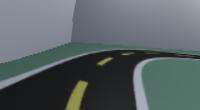

In [26]:
random_image

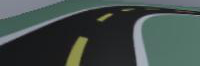

In [27]:
cropped

In [34]:
model = keras.models.load_model(model_path)

ValueError: bad marshal data (unknown type code)